# SUPER-STORE ANALYSIS

<h5> DATASET DESCRPTION


The Superstore Sales dataset contains historical sales records from supermarket branches. The dataset includes information about sales such as shipping mode, segment, quantity , city, region, discount , profit etc.<br> <br>
The dataset has a total of 9994 rows and 13 columns i.e. Shape of data is ( 9994 x 13 ) <br>
The dataset contains both numeric and categorical data, requiring various analysis techniques. Overall, it gives a comprehensive view of sales data, allowing analysis by product and location.<br>
<br>Here is a glimpse of data
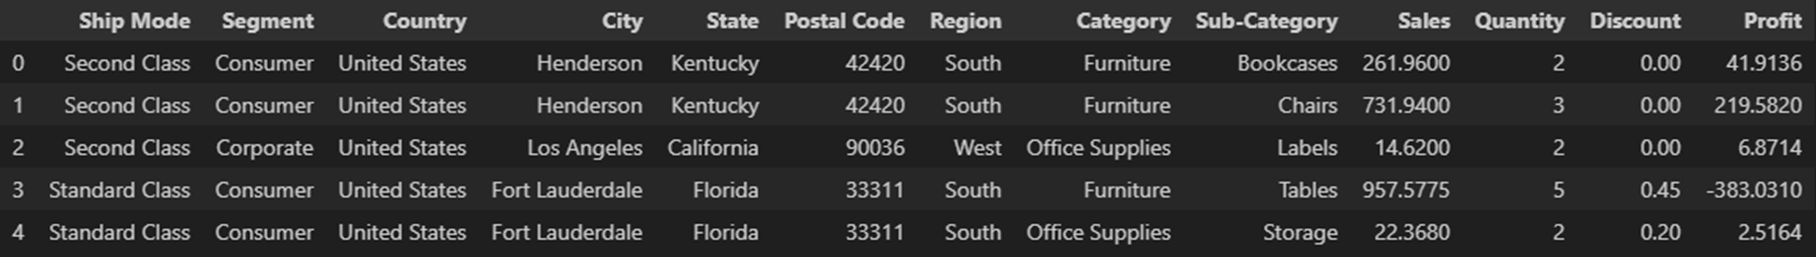


<h5> COLUMN DESCRIPTION

The dataset contains details of the sales made by the super-store. The data file contain the following 13 columns:

- Ship mode : The mode of shipping ( First class, Second class, Standard class)
- Segment : The catgory of purchaser ( Consumer, Corporate , Home-office)
- Country : All the sales are made in United States
- City : Name of city (eg Los angeles, New York etc.)
- State : Name of state (eg Texas, California etc.)
- Postal code : Information about Postal address ()
- Region : info about region (east, west , south , north)
- Category : info about category of product (Technology , Office supplies, Furniture)
- Sub-category : info about sub-category of product ( Tables , Envelopes, Paper, Phone etc.)
- Sales : The sales made by each purchase
- Quantity : The number of product purchased (in quantity)
- Discount : The discount given on purchase
- Profit : the profit made by the sales

<h5>IMPORTING LIBRARIES

In [36]:
# Importing the required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<h5>IMPORTING DATA

In [37]:
# Reading csv file into pandas DataFrame
data = pd.read_csv('super_store0.csv')
data.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [38]:
# Shape of Data
data.shape 

(9994, 13)

<h4> DATA WRANGLING

In [39]:
# Info of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [40]:
# Description of data
data.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [41]:
# Checking columns for null values
data.isnull().sum() 

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [42]:
# Total duplicated data
data.duplicated().sum()

np.int64(17)

In [43]:
# Dropping duplicates
data.drop_duplicates(inplace=True)

In [44]:
# Retrieving Column names 
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [45]:
# Unique data-values in columns
for i in data.columns:
    print(i, data[i].nunique()) 
    

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


<h5>INSIGHTS</h5>

1. There are 13 column and 9994 rows .
2. There are no null values.
3. There are 5 numerical columns.
4. The column `country` contains only one type of value (hence, can be dropped)



<h4> DATA PREPARTION/CLEANING FOR ANALYSIS

In [46]:
# Dropping Country column as it has only one unique value
data.drop('Country', axis=1, inplace=True)

In [47]:
# Rounding off floating values to 2 decimal places
data['Discount']=round(data['Discount'],2)
data['Sales']=round(data['Sales'],2)
data['Profit']=round(data['Profit'],2)

In [48]:
data.head(5)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.00,41.91
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.00,219.58
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.00,6.87
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.58,5,0.45,-383.03
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.37,2,0.20,2.52


<h4> DESCRIPTIVE STATISTICS AND POTENTIAL OUTLIERS

In [49]:
data.describe(include='all')

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.000000
unique,4,3,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5955,5183,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148881,3.790719,0.156278,28.690082
std,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721412,2.226657,0.206455,234.457882
min,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.440000,1.000000,0.000000,-6599.980000
25%,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.730000
50%,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.820000,3.000000,0.200000,8.670000
75%,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.370000


In [50]:
for i in ['Ship Mode','Segment','State','Region','Category','Sub-Category']:
    print(data[i].value_counts())
    print('\n')

Ship Mode
Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: count, dtype: int64


Segment
Consumer       5183
Corporate      3015
Home Office    1779
Name: count, dtype: int64


State
California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma      

<h4>DATA TRENDS AND CORRELATIONS

In [70]:
# NET SALES AND PROFIT
x= round(data['Profit'].sum(),2)
y= round(data['Sales'].sum(),2)
z= data['Sales'].count()
print('Net Profit :',x,'\n','Total sales: ',y)
print('profit % : ', round((x/y)*100,2)) 
print('profit per sales', round(x/z,2))

Net Profit : 286240.95 
 Total sales:  2296195.39
profit % :  12.47
profit per sales 28.69


<Axes: xlabel='count', ylabel='Sub-Category'>

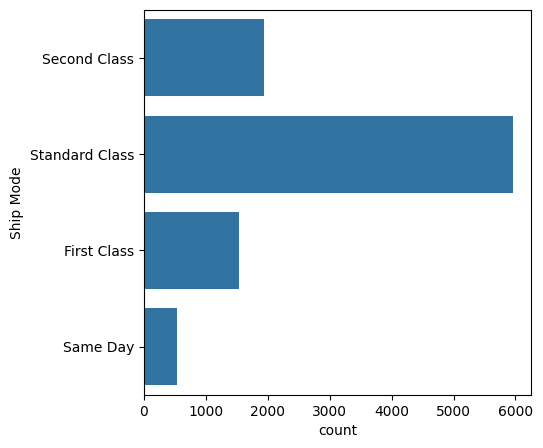

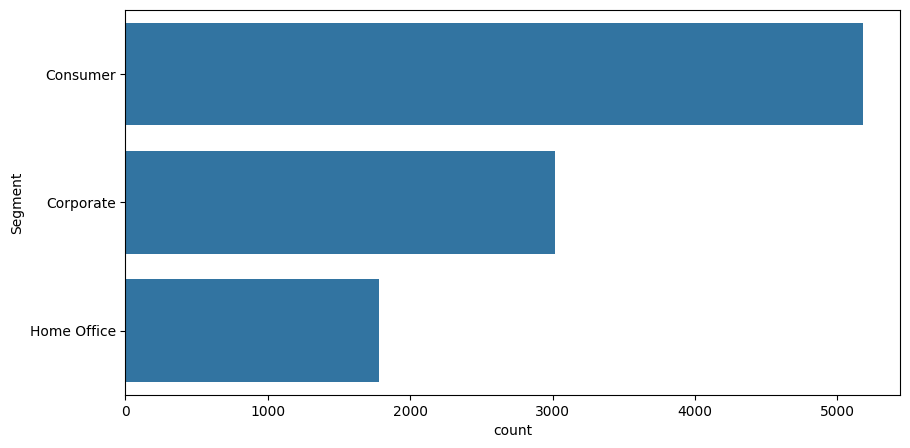

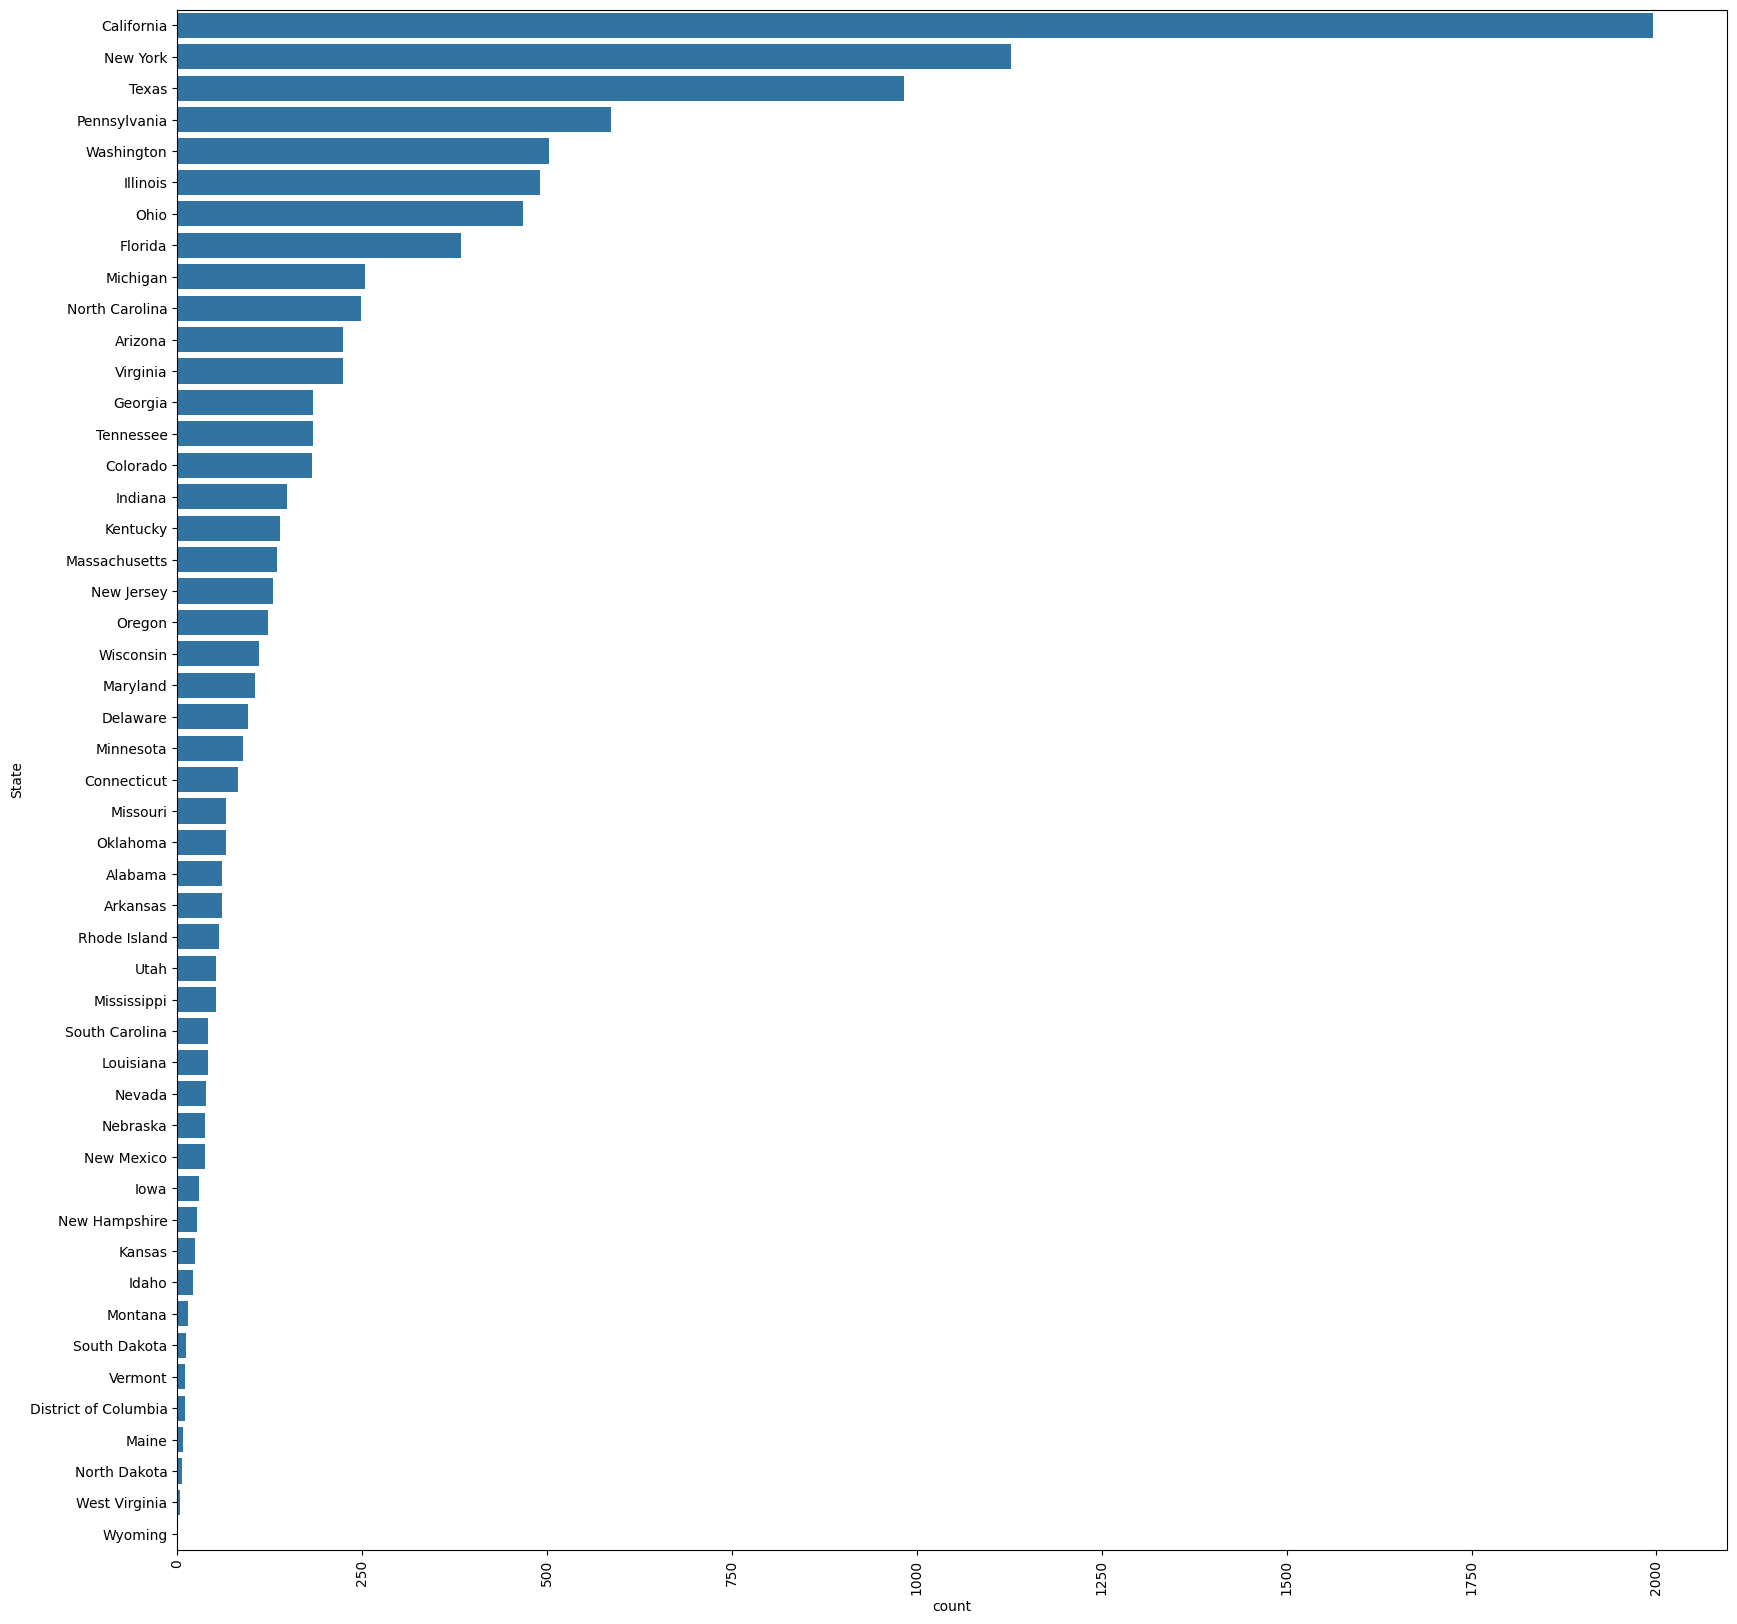

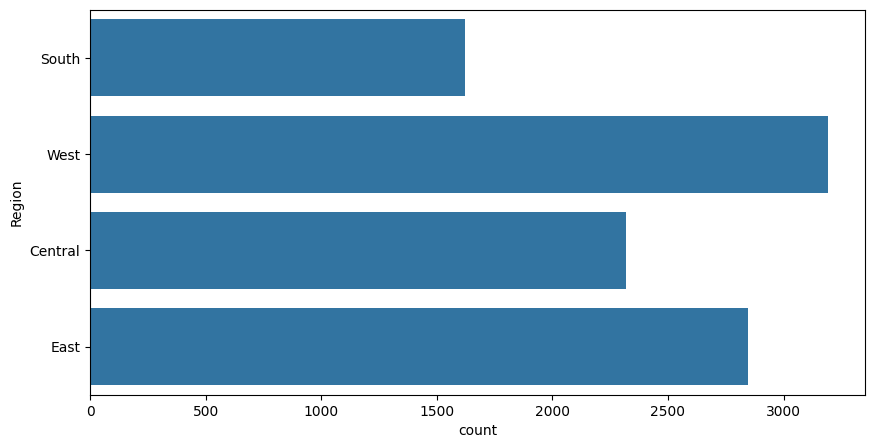

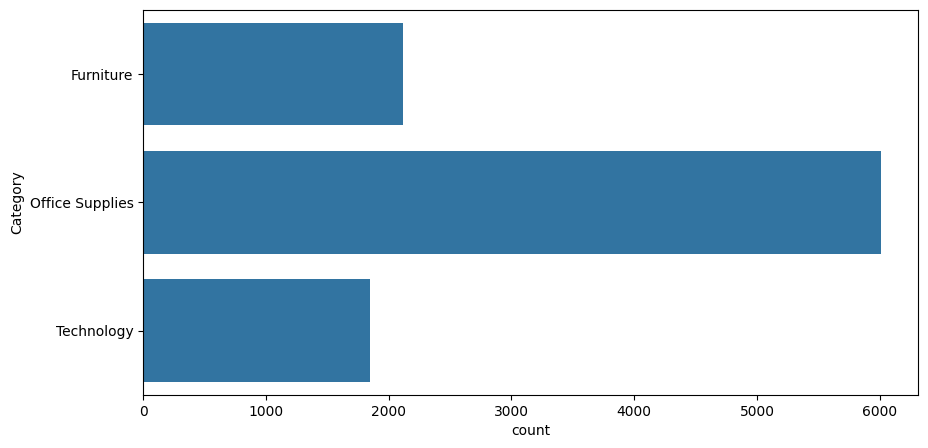

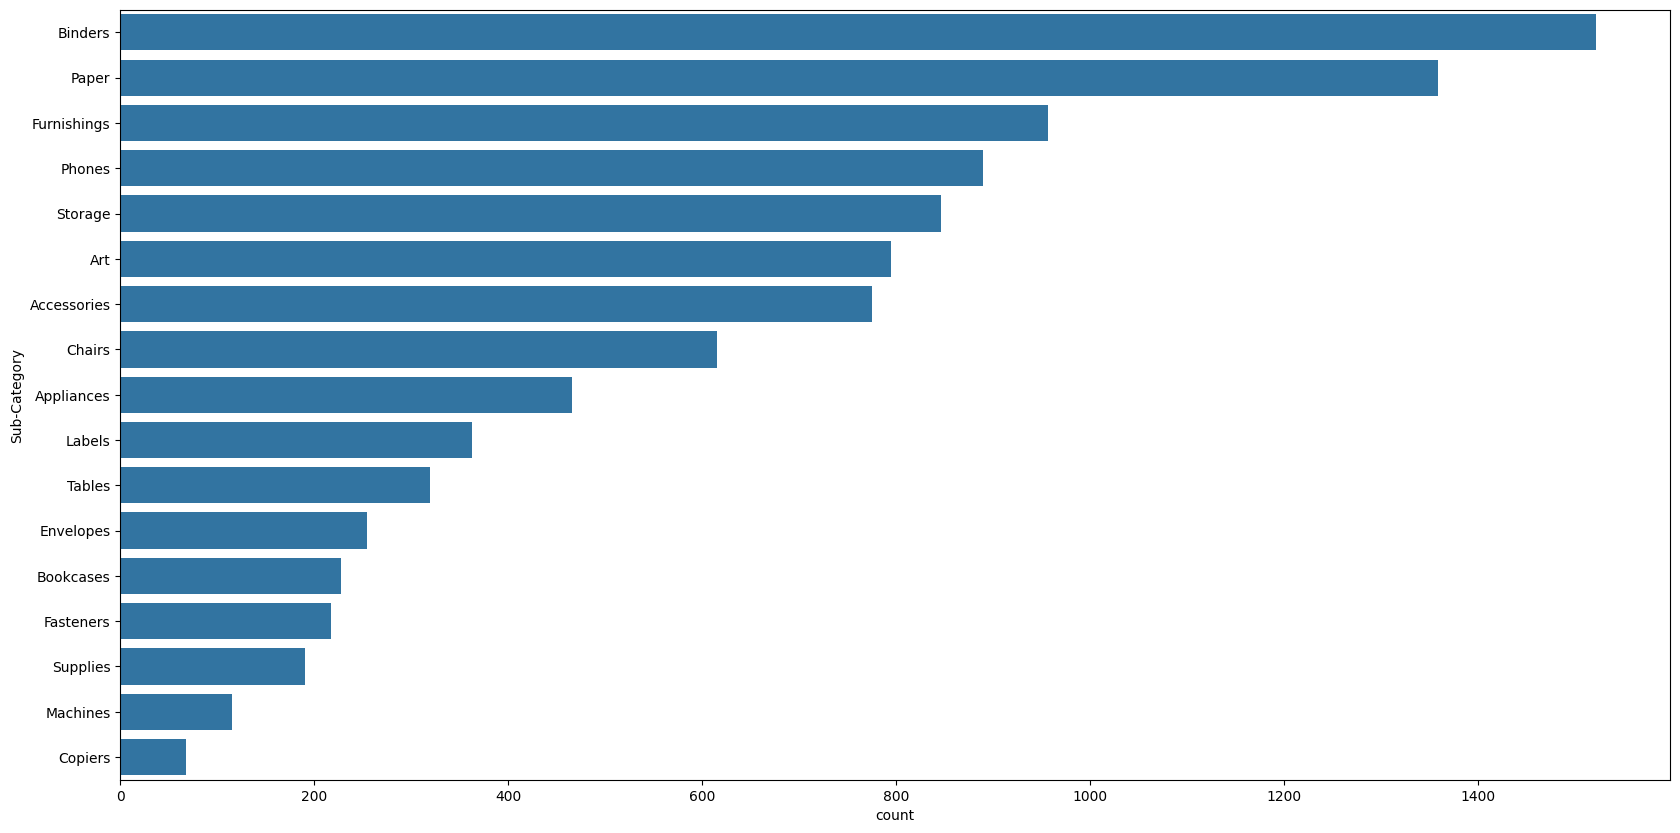

In [51]:
# Ship Mode

plt.figure(figsize=(5,5))  
sns.countplot(data['Ship Mode'])

# Segment   

plt.figure(figsize=(10,5))
sns.countplot(data['Segment'])

# State

plt.figure(figsize=(20,20))
sns.countplot(data['State'], order=data['State'].value_counts().index)
plt.xticks(rotation=90)


# Region

plt.figure(figsize=(10,5))
sns.countplot(data['Region'])


# Category

plt.figure(figsize=(10,5))
sns.countplot(data['Category'])

#Sub-Category
plt.figure(figsize=(20,10))
sns.countplot(data['Sub-Category'], order=data['Sub-Category'].value_counts().index)

<H5> SALES AND PROFIT DISTRIBUTION AND THEIR CORRELATION


<Axes: xlabel='Sales', ylabel='Profit'>

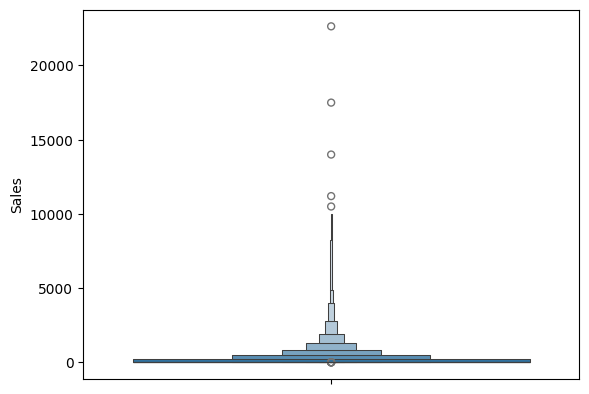

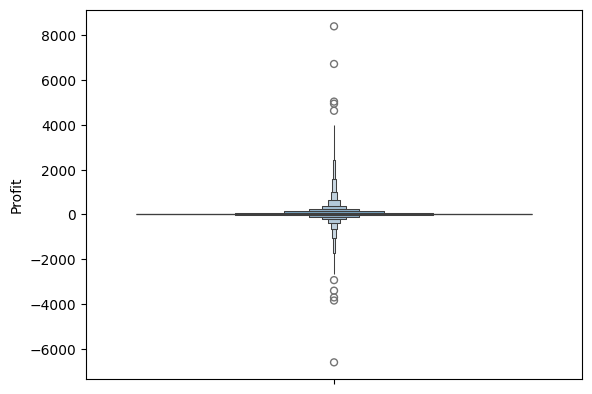

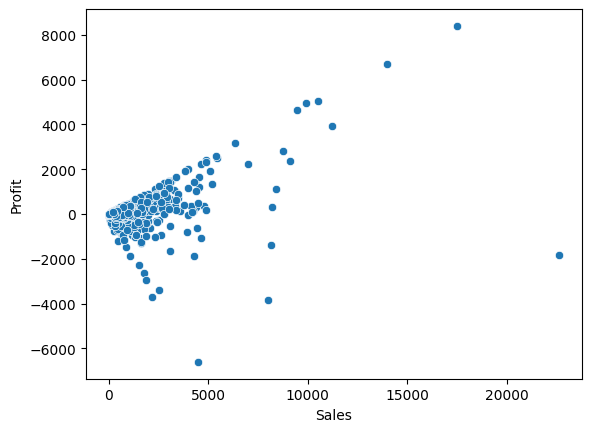

In [52]:
# Sales
sns.boxenplot(data=data['Sales'])
plt.figure()

# Profit
sns.boxenplot(data=data['Profit'])
plt.figure()

# Correlation Matrix
sns.scatterplot(data=data,x='Sales',y='Profit')

<h5> IDENTIFYING OUTLIERS

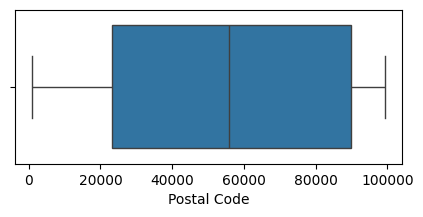

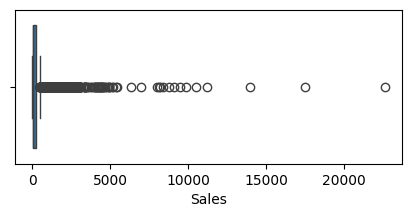

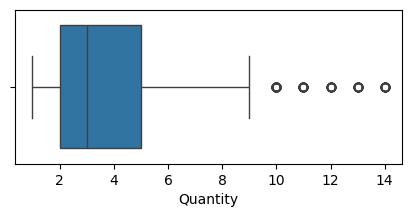

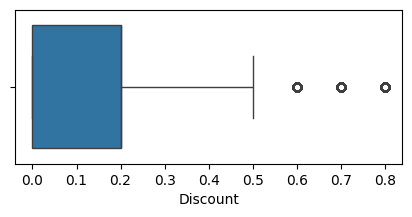

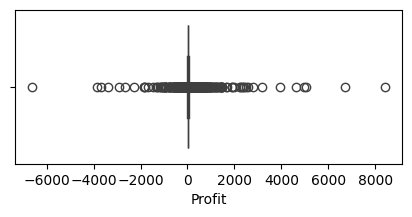

In [56]:
x=['Postal Code','Sales','Quantity','Discount','Profit']
for i in x:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=i,data=data)
    plt.show()

<h5> HEAT MAP 

<Axes: >

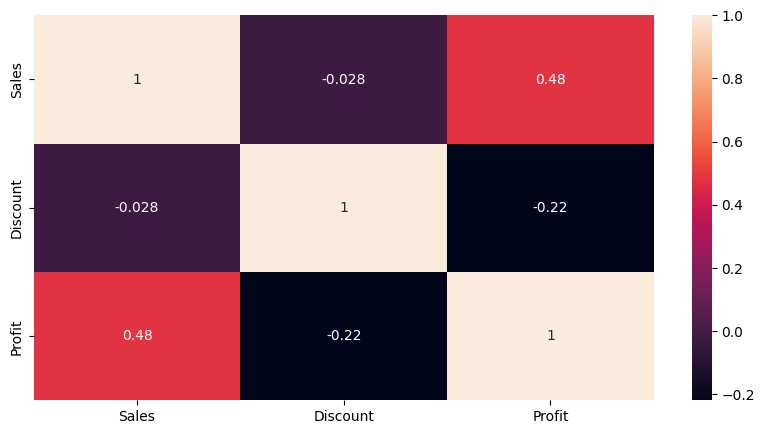

In [53]:
# Heatmap
x= data.select_dtypes(include='Float64')
plt.figure(figsize=(10,5))
sns.heatmap(x.corr(),annot=True)


<Axes: xlabel='Category,Sub-Category'>

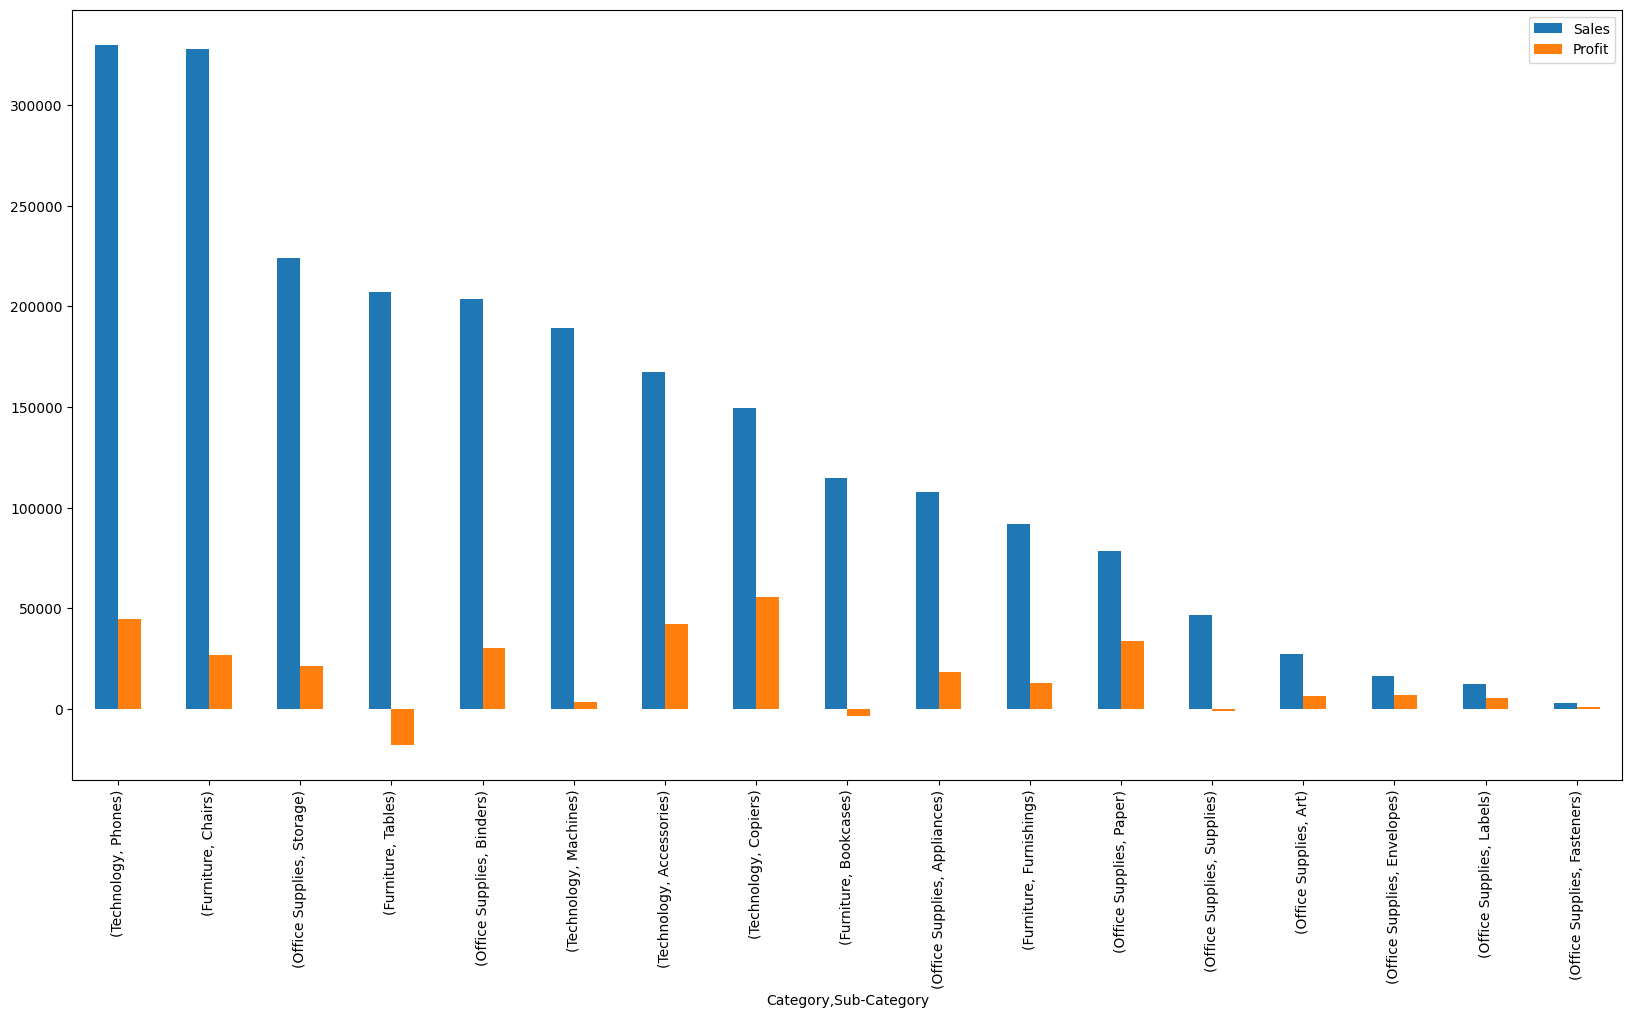

In [54]:
# Grouping data by Category and Sub-Category

x=data.groupby(['Category','Sub-Category'])[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
x.plot(kind='bar',figsize=(20,10))

<H5> SALES AND PROFIT TRENDS


<Axes: xlabel='Quantity'>

<Figure size 1000x500 with 0 Axes>

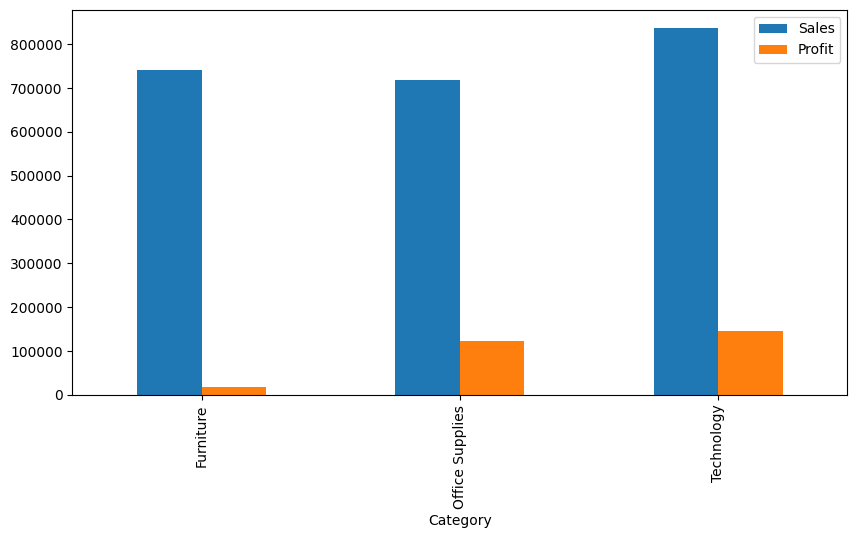

<Figure size 1000x500 with 0 Axes>

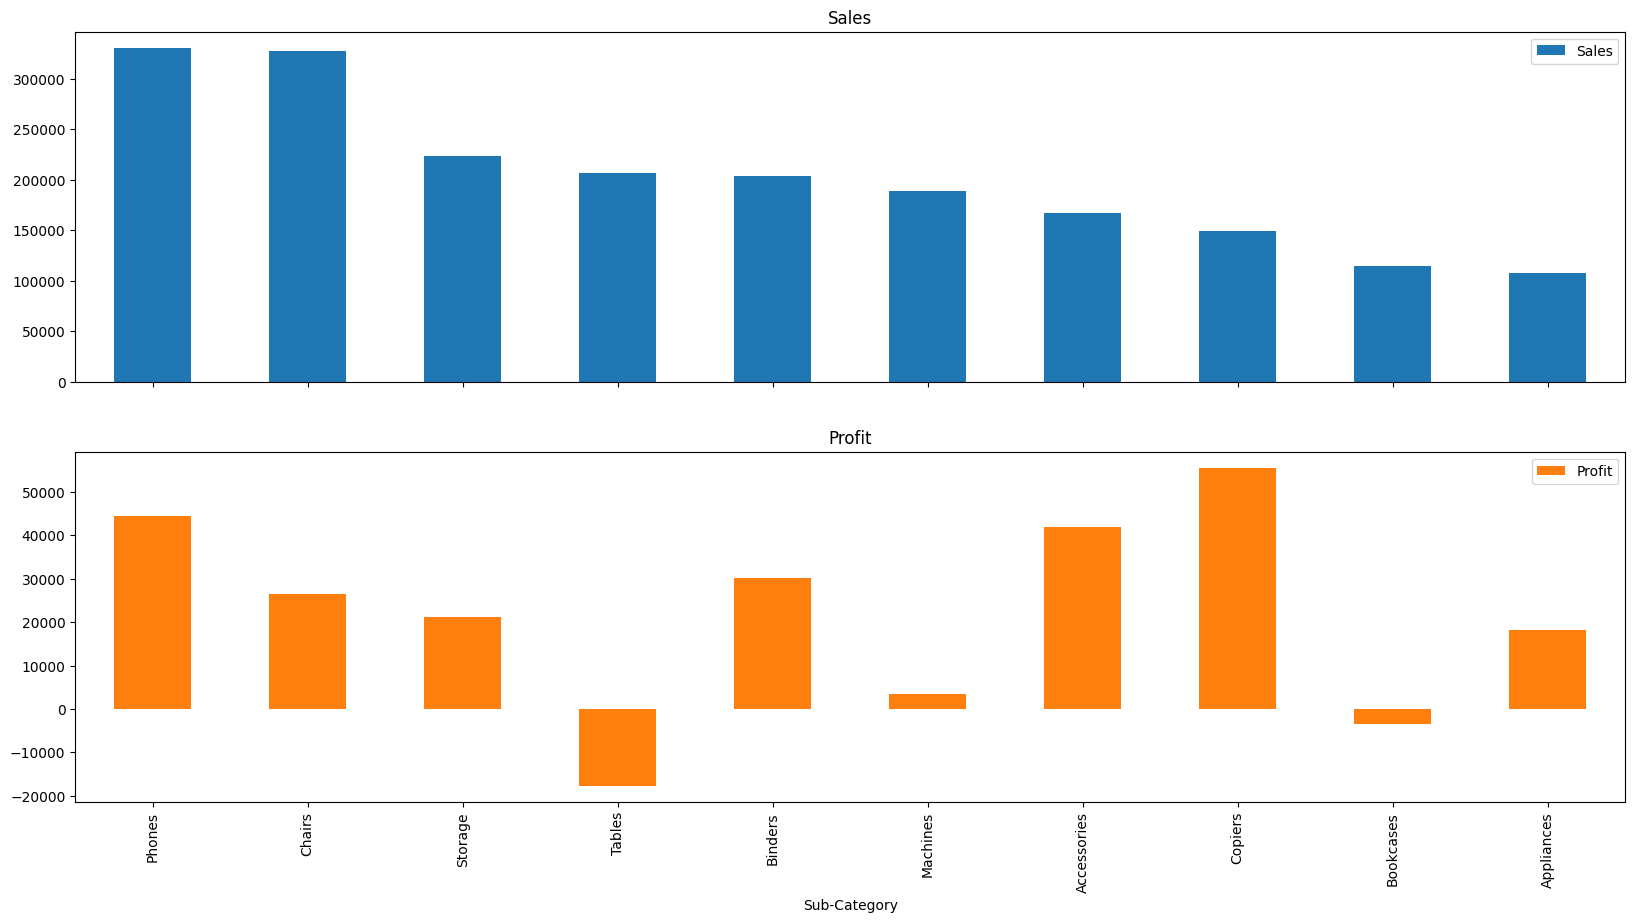

<Figure size 2000x1000 with 0 Axes>

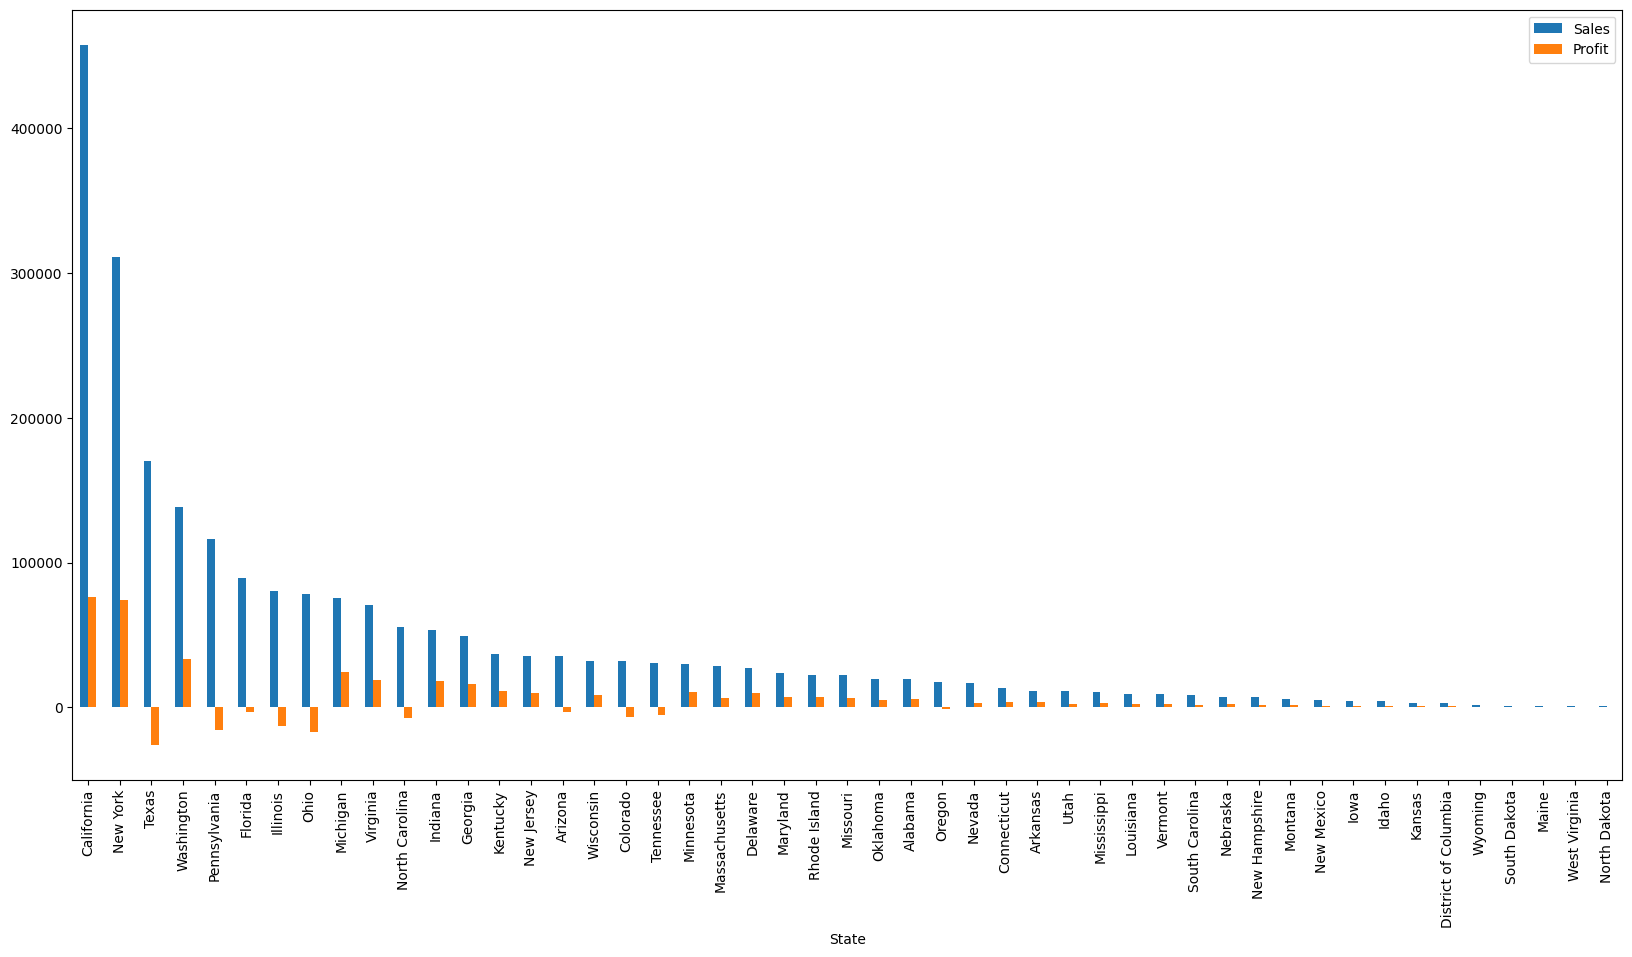

<Figure size 1000x500 with 0 Axes>

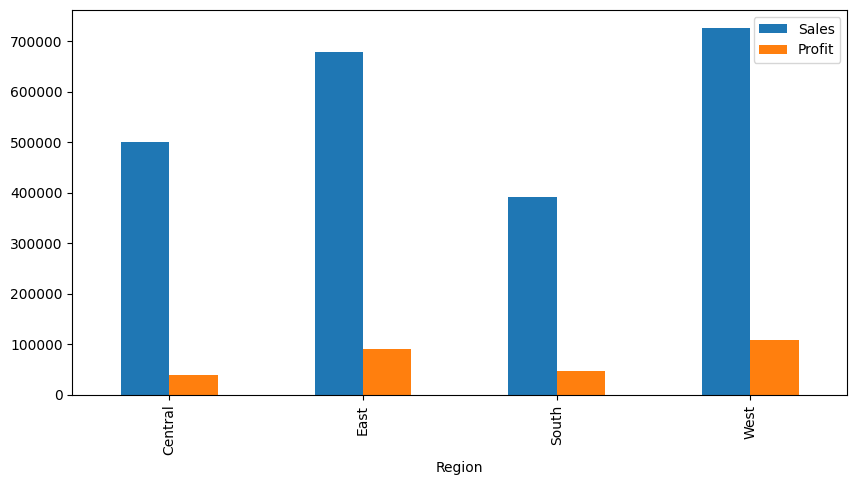

<Figure size 1000x500 with 0 Axes>

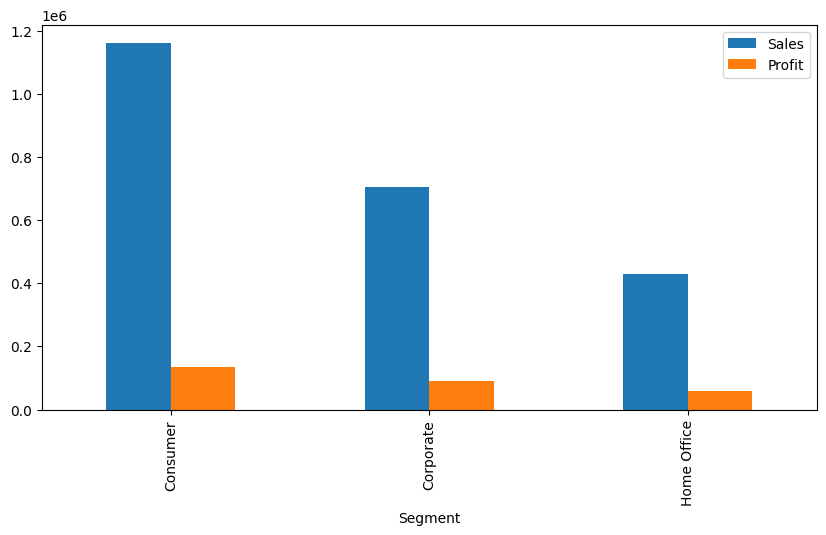

<Figure size 1000x500 with 0 Axes>

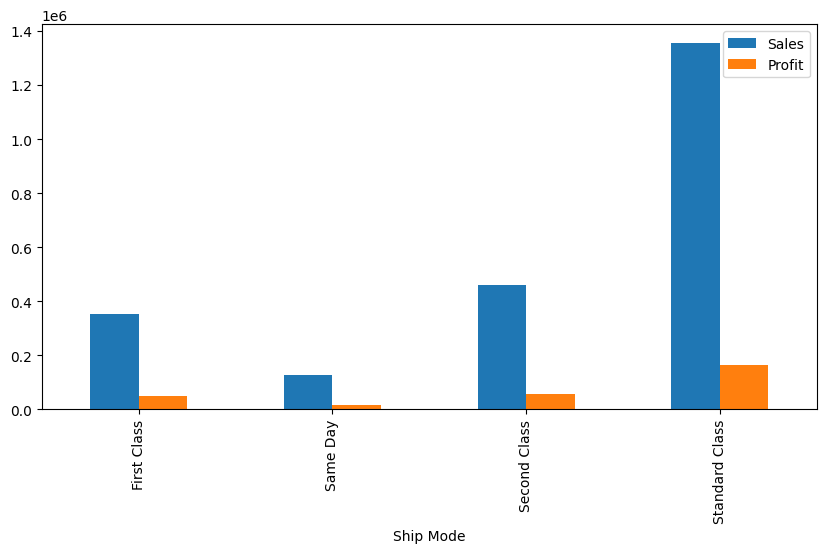

<Figure size 1000x500 with 0 Axes>

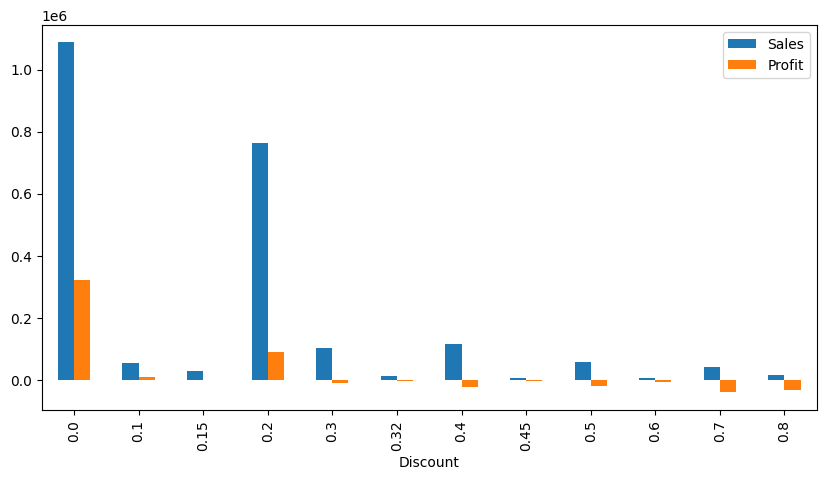

<Figure size 1000x500 with 0 Axes>

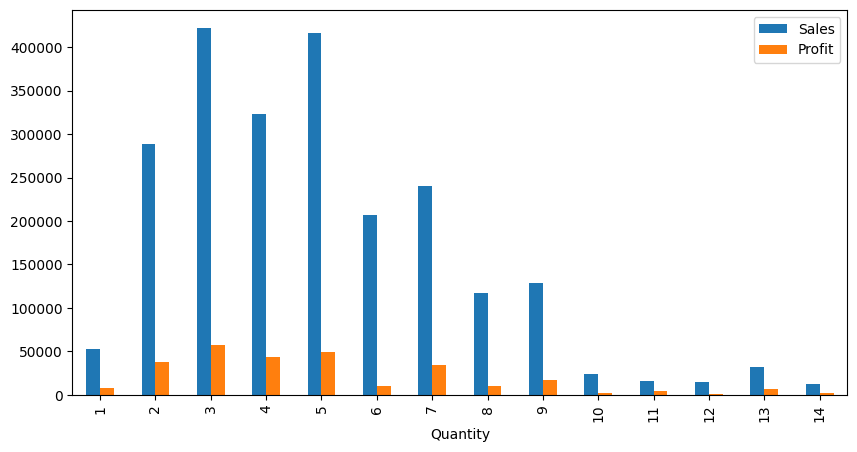

In [55]:
plt.figure(figsize=(10,5))
data.groupby('Category')[['Sales','Profit']].sum().plot(kind='bar',figsize=(10,5))

plt.figure(figsize=(10,5))
data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).head(10).plot(kind='bar',figsize=(20,10),subplots=True)

# Grouping data by State
plt.figure(figsize=(20,10))
data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).plot(kind='bar',figsize=(20,10))

# Grouping data by Region
plt.figure(figsize=(10,5))
data.groupby('Region')[['Sales','Profit']].sum().plot(kind='bar',figsize=(10,5))

# Grouping data by Segment
plt.figure(figsize=(10,5))
data.groupby('Segment')[['Sales','Profit']].sum().plot(kind='bar',figsize=(10,5))

# Grouping data by Ship Mode
plt.figure(figsize=(10,5))
data.groupby('Ship Mode')[['Sales','Profit']].sum().plot(kind='bar',figsize=(10,5))

# Grouping data by Discount
plt.figure(figsize=(10,5))
data.groupby('Discount')[['Sales','Profit']].sum().plot(kind='bar',figsize=(10,5))

# Grouping data by Quantity
plt.figure(figsize=(10,5))
data.groupby('Quantity')[['Sales','Profit']].sum().plot(kind='bar',figsize=(10,5))



<H5> CATEGORY-WISE ANALYSIS

<Figure size 640x480 with 0 Axes>

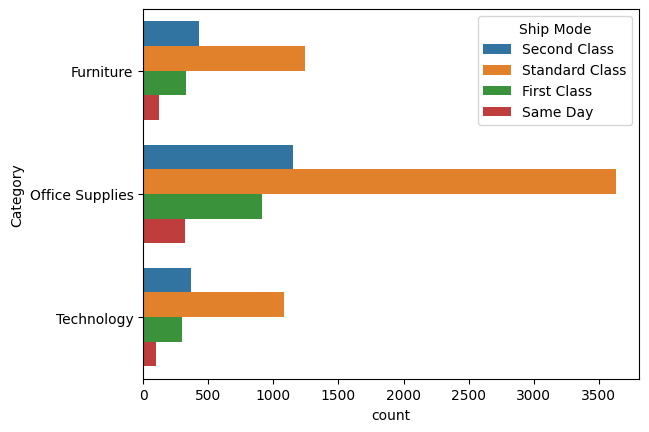

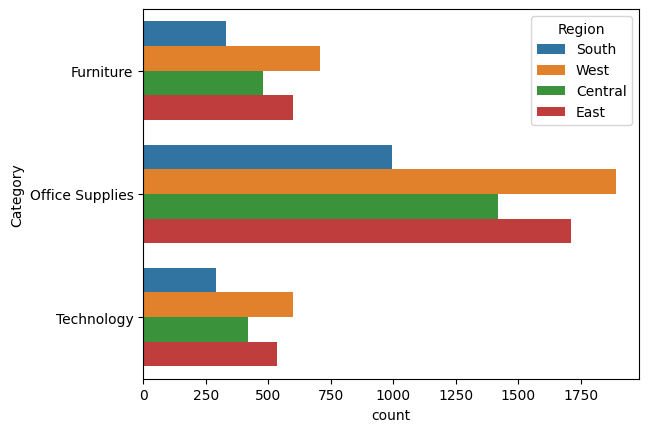

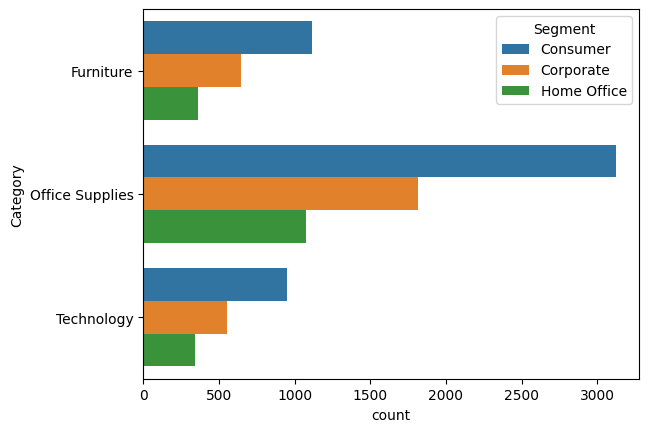

<Figure size 640x480 with 0 Axes>

In [28]:
sns.countplot(data=data,y='Category',hue='Ship Mode')
plt.figure()

sns.countplot(data=data,y='Category',hue='Region',)
plt.figure()

sns.countplot(data=data,y='Category',hue='Segment')
plt.figure()



<H5> SUB-CATEGORY WISE ANALYSIS

<Axes: xlabel='Sub-Category'>

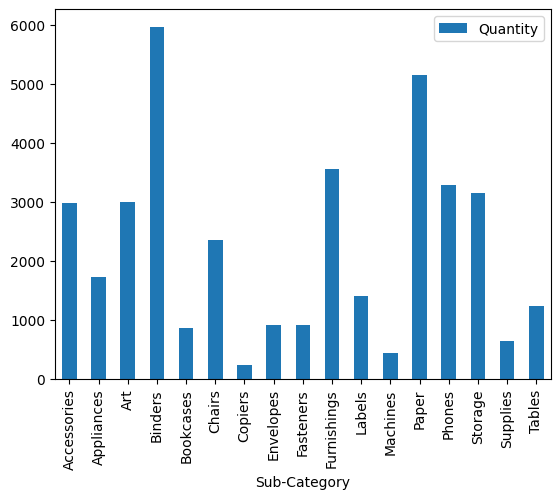

In [29]:
dd=data[['Sub-Category','Quantity']]
x=dd.groupby('Sub-Category').sum()
x.plot(kind='bar')

<Axes: xlabel='Sub-Category'>

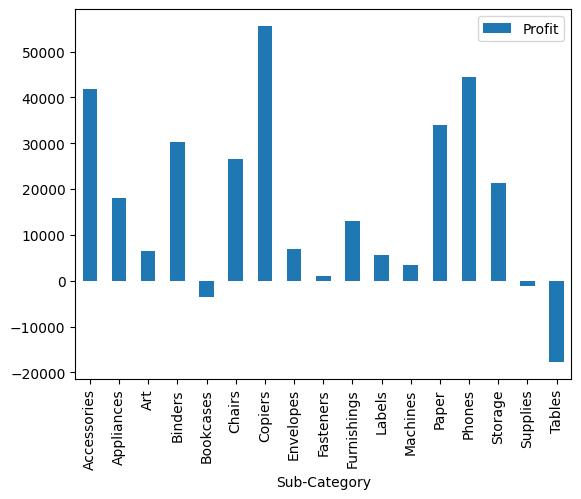

In [30]:
dd= data[['Sub-Category','Profit']]
x=dd.groupby('Sub-Category').sum()
x.plot(kind='bar')

<h4>INSIGHTS

1. Preffered ship mode ->    STANDARD
2. Largest share of users -> CONSUMER
3. Largest state by sales -> CALIFORNIA, NEW YORK, TEXAS
4. Net sales ->              2296195.39
5. Net profit ->             286240.95
6. Primary sales category -> Ofiice supplies
7. Category producing most profit -> Technology
8. States showing negative profit -> Texas, Pensylvania, Ohio
9. Most sold product (by quantity) -> Binders, Papers
10. Product showing neative profit -> Tables, Bookcases
